# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "彭盛皓"
student_id = "B06201008"

---

# Exercise 1 - Newton

### Use the Newton's method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define the function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$ and its derivative $df$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        return np.cosh(x) + np.cos(x) - c
        # ====================
    return f

def df(x):
    # Hint: return ...
    # ===== 請實做程式 =====
    return np.sinh(x) - np.sin(x) 
    # ====================

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1
assert df(0) == 0

### 2. Implement the algorithm

In [5]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=10,
    report_history=True
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # ===== 請實做程式 =====
    # Set the initial conditions
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return (x_n, history)
            else:
                return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        # Avoid zero derivative
        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            if report_history:
                return None, history
            else:
                return None
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = x_n - f_of_x_n / d_f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return (x_n, history)
            else:
                return x_n
    # ====================

Test your implementation with the assertion below.

In [6]:
root = newton(
    lambda x: x**2 - x - 1, 
    lambda x: 2*x - 1, 
    1.2, 
    max_iterations=100, 
    tolerance=1e-7, 
    report_history=False
)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

Found solution after 4 iterations.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

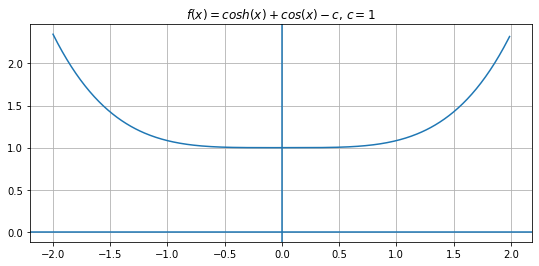

In [7]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0, 2.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
# ===== 請實做程式 =====
root = None
# ====================

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [10]:
root, history = newton(
    f,
    df,
    1,
    tolerance=1e-10,
    max_iterations=10
)

Terminate since reached the maximum iterations.


C:\Users\Howard\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in cosh
  
C:\Users\Howard\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in sinh
  del sys.path[0]
C:\Users\Howard\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in double_scalars


According to the plot, the equation does not have root. So, no matter how many times iteration it do, it still cannot find out the solution. It stops because it reaches the maximum iterations (runtimewarning).

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

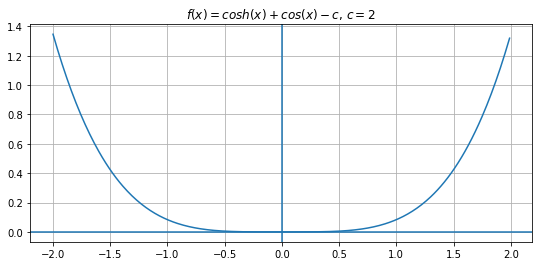

In [11]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0, 2.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [12]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 0
# ====================

In [13]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [14]:
root, history = newton(
    f,
    df,
    1,
    tolerance=1e-10,
    max_iterations=10
)

Terminate since reached the maximum iterations.


First, I executed the program, I found that the iterations terminated too early such that the estimation of root is away from the exactly answer. So I changed the max_iterations to 100. Then we can find out more closer answer.

In [15]:
root, history = newton(
    f,
    df,
    1,
    tolerance=1e-10,
    max_iterations=100
)

Found solution after 18 iterations.


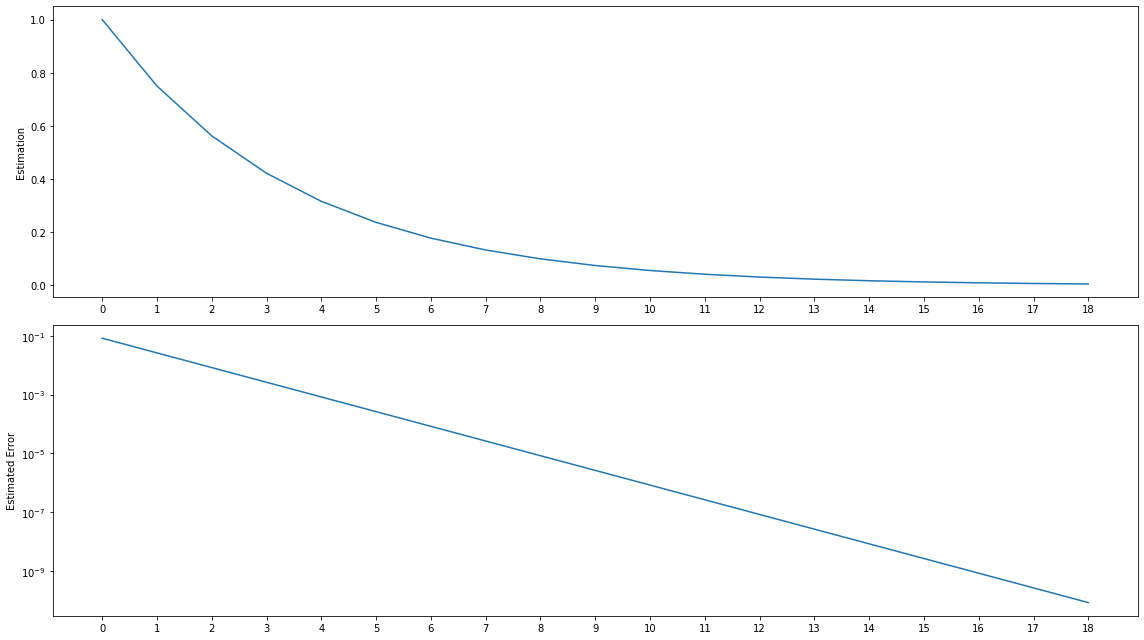

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

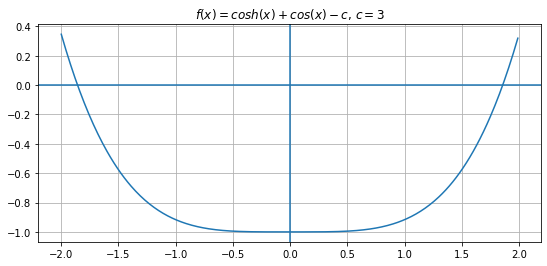

In [17]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0, 2.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [18]:
# Hint: root = ?
# ===== 請實做程式 =====
root, history = newton(
    f,
    df,
    1,
    tolerance=1e-10,
    max_iterations=100
)
# ====================

Found solution after 8 iterations.


In [19]:
print('My estimation of root:', root)


My estimation of root: 1.8579208291501985


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [20]:
root, history = newton(
    f,
    df,
    1,
    tolerance=1e-10,
    max_iterations=10
)

Found solution after 8 iterations.


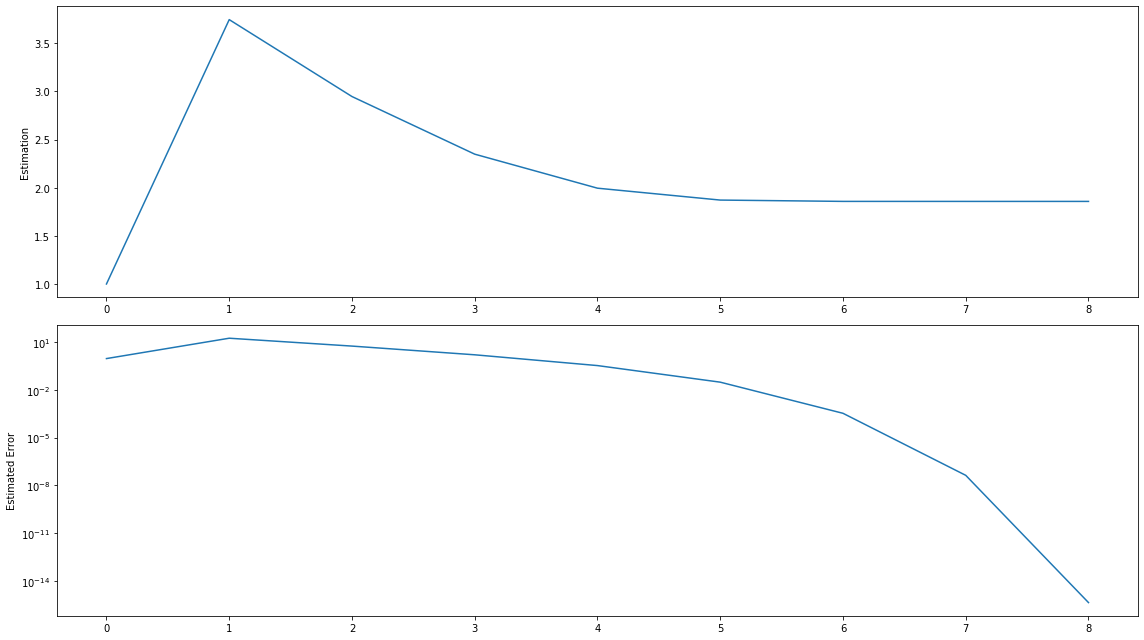

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

#### c = 1

By easily observation, there is no root for $c = 1$. Therefore, the Newton method cannot work, and the iteration would not stop. It would continue finding tangent line. 

#### c = 2

For $c = 2$, The Newton method can work, and the estimation error converges linearly, which is corresponding with theoretical analysis. 

Suppose given the tolerance $\epsilon=10^{-10}$.

To eatimate the error, we use the estimated root $1.8579$.

The minimal iterations $n$ to converge started from the point $1$ can be derived by

$$|error| > (\frac{1}{2} \frac{f''(1.8579)}{f''(1.8579)})^{n+1} \implies 10^{-10} > \frac{1}{2^{n+1}} \implies n > \log_2(10^{10})-1 \implies n \geq 33.$$

#### c = 3

For $c = 3$, we can observe that there are two different roots in this case. The Newton method can work, and the estimation error converges quadratically, which is corresponding with theoretical analysis.

Suppose given the tolerance $\epsilon=10^{-10}$.

To eatimate the error, we use the estimated root $1.8579$.

The minimal iterations $n$ to converge started from the interval point $1$ can be derived by

$$|error| > (\frac{1}{2} \frac{f''(1.8579)}{f'(1.8579)})^{1 + 2^1 + 2^2 + \dots + 2^{n-1}} \implies 10^{-10} > (\frac{1}{2} \frac{f''(1.8579)}{f'(1.8579)})^{2^n - 1} \implies  10^{-10} > (\frac{1}{2} \frac{cosh(1.8579) - cos(1.8579)}{sinh(1.8579) - sin(1.8579)})^{2^n - 1} $$

$$\implies 10^{-10} > (\frac{1}{2} 1.6449)^{2^n - 1} \implies 10^{-10} > 0.8225^{2^n - 1} \implies (1 - 2^n)\log(0.8225) > \log(10^{10}) \implies (2^n - 1) > \frac{23.0258}{0.1954} = 117.8393 $$

$$\implies n > log_2(118.8393) = 6.8929 \implies n \geq 7.$$


#### Conclusion

There are still some differences between our estimation and real experiment because of different initial point.

And, because I use $1.8579$ as the estimation, there are quite differences in Taylor expansion.